# Animals-10 Data Exploration
The [Animals-10 Dataset](https://www.kaggle.com/datasets/alessiocorrado99/animals10?resource=download) is made by Corrado Alessio. There are a multitude of goals that I want to acheive in this exploration. These include:
- Explore Dataset and its characteristics
- Identify issues
- Develop solutions
- Preprocess for image classification training

# Exploring the Dataset
To get a feel of what the dataset is about, the first step would be to read what the author has outlined for us:

> Hello everyone!
> This is the dataset I have used for my matriculation thesis.
> It contains about 28K medium quality animal images belonging to 10 categories: dog, cat, horse, spyder, butterfly, chicken, sheep, cow, squirrel, elephant.
> I have used it to test different image recognition networks: from homemade CNNs (~80% accuracy) to Google Inception (98%). It could simulate a smart gallery for a researcher (like a biologist).
> All the images have been collected from "google images" and have been checked by human. There is some erroneous data to simulate real conditions (eg. images taken by users of your app).
> The main directory is divided into folders, one for each category. Image count for each category varies from 2K to 5 K units.".

As we can see here he mentions that the dataset includes 10 categories:`dog`, `cat`, `horse`, `spider`, `butterfly`, `chicken`, `sheep`, `cow`, `squirrel`, and `elephant`. We should confirm this as one of the key concepts I have learned is to not trust everything until I am able to verify the datapoint my self. So lets analyze the zip file and see what included. The file was downloaded and extracted into the data folder.

The data zip file can be downloaded from [here](https://www.kaggle.com/datasets/alessiocorrado99/animals10?resource=download).

In [1]:
import os

import matplotlib.pyplot as plt

data_dir = 'data'
data_files = sorted(os.listdir(data_dir))
print(data_files)

['raw-img']


As we can see, there are two files included: a `raw-img` folder and `translate.py` python file. Looking at the translate.py file, it seems to be a translation file. It contains a `dict` that gives translations of the supposed classes from Italian to English. This will be useful to use later. The next step is to take a look into the `raw-img` folder.

In [2]:
raw_dir = data_dir + '/' + data_files[0]
raw_files = sorted(os.listdir(raw_dir))

print(raw_files)
# for later conversion back ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


These look to be the class folders! Only issue is that they seem to be in Italian. This can easily be fixed by using the `translation.py` file found earlier. There are a majority of ways to use this file, but in my case, it easier to move the file to the root directory of the notebook, rather then make it into a module. Since the file only contains a single dict, I decided it wasnt worth the extra steps to make it a module. There are many ways to use this file, this is the way I decided to use it.

In [3]:
# Check if second file (translation.py) exists, if it does move it
if 1 < len(data_files):
    os.rename(data_dir + '/' + data_files[1], data_files[1])
    print('Moved translation.py to root directory of notebook')
else:
    print('translation.py may have already been moved or is missing')

import translate # The dict given to us by dataset author

# Translate Italian folder names to English
for folder in raw_files:
    os.rename(raw_dir + '/' + folder,
              raw_dir + '/' + translate.translate[folder])

Moved translation.py to root directory of notebook


KeyError: 'ragno'

What happened? It seems the `ragno` key doesn't exist in the imported dictionary. Lets investigate this by printing out the included dictionary.

In [4]:
print(translate.translate)

{'cane': 'dog', 'cavallo': 'horse', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'pecora': 'sheep', 'scoiattolo': 'squirrel', 'dog': 'cane', 'elephant': 'elefante', 'butterfly': 'farfalla', 'chicken': 'gallina', 'cat': 'gatto', 'cow': 'mucca', 'spider': 'ragno', 'squirrel': 'scoiattolo'}


Ah! Takeing a deeper look at this `dict` you can see that there indeed is a missing translation! `'rago': 'spider'` doesn't exist! Just another reason to always expect your data to be wrong until you can prove otherwise. This is a simple fix. We will also see what files were correctly translated and which ones still need to be translated as well.

Note: This could be fixed if you decide to follow through these steps on your own. Do your own investigation and see if the issue still exists!

In [5]:
fixedTranslate = translate.translate.copy()
fixedTranslate.update({'ragno':'spider'})
print(fixedTranslate)
print('\nCurrent Folder Names:')
print(os.listdir(raw_dir))

{'cane': 'dog', 'cavallo': 'horse', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'pecora': 'sheep', 'scoiattolo': 'squirrel', 'dog': 'cane', 'elephant': 'elefante', 'butterfly': 'farfalla', 'chicken': 'gallina', 'cat': 'gatto', 'cow': 'mucca', 'spider': 'ragno', 'squirrel': 'scoiattolo', 'ragno': 'spider'}

Current Folder Names:
['horse', 'sheep', 'elephant', 'cat', 'scoiattolo', 'chicken', 'ragno', 'dog', 'cow', 'butterfly']


Now that we fixed the translation dict, the only step is to fixed untranslated folders. As seen above, the only two folders that were not translated was `scoiattolo` and `ragno`. We can quickly manualy translate them as there is only two folders.

In [6]:
os.rename(raw_dir + '/ragno',
          raw_dir + '/' + fixedTranslate['ragno'])
os.rename(raw_dir + '/scoiattolo',
          raw_dir + '/' + fixedTranslate['scoiattolo'])
print(os.listdir(raw_dir))

['horse', 'sheep', 'elephant', 'cat', 'chicken', 'dog', 'spider', 'squirrel', 'cow', 'butterfly']


Now we have the correct folder names. With this we can compare what was the expected classes and what was given in the dataset archive. We expect to see 10 categories:`dog`, `cat`, `horse`, `spider`, `butterfly`, `chicken`, `sheep`, `cow`, `squirrel`, and `elephant`. Comparing this list with the current printout above of the file names, they seem to match! So we can confirm that we have these 10 classes to work with. Now it's time to dig a bit deeper and look at the stats of each of these classes.

The things to investigate when exploring a new dataset would be:
* Class Imbalance (Num of imgs in each class in this case)
* Size of the Images
* Color Imbalances

 # Checking for Class Imbalance
 First thing to do is list the number of file under each class. This will help give a better idea of figuring out if there is a class imbalance and where.

  folder_name  number_of_files
0   butterfly             2112
1         cat             1668
2     chicken             3098
3         cow             1866
4         dog             4863
5    elephant             1446
6       horse             2623
7       sheep             1820
8      spider             4821
9    squirrel             1862


<AxesSubplot:xlabel='folder_name', ylabel='number_of_files'>

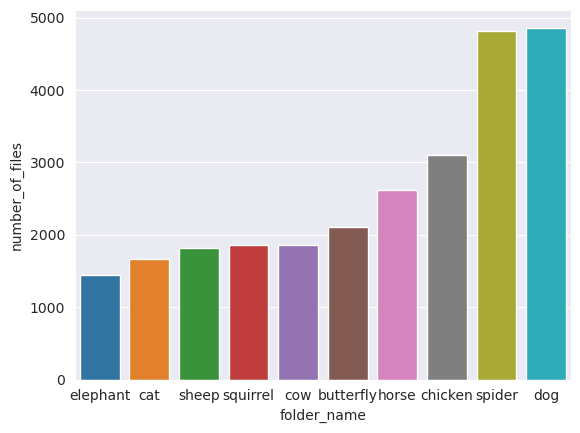

In [3]:
# Grab sample of files to see what data looks like
import pandas as pd
import seaborn as sns
from collections import Counter

data = []

raw_files = os.listdir(raw_dir)
# Print number of images
for folder in sorted(raw_files):
    folder_files = os.listdir(raw_dir + '/' + folder)
    data.append([folder,len(folder_files)])

# Convert to data frame for easy use
df = pd.DataFrame(data=data,
                  columns=['folder_name','number_of_files'])
print(df)
sns.barplot(data=df.sort_values("number_of_files"), x="folder_name", y="number_of_files")

Currently it seems that there **IS** a class imbalance. Spider and dog have double or more then a majority of the other classes. There are a few ways to fix this:

* Remove some images from the high image count classes to get closer to a Uniform Distribution
* Add images to the low image count classes to get closer to a Uniform Distribution
* Do not modifiy the dataset and use a weighted dataloader to help show more of the low image count classes during training.

Removing images is the most direct solution as it will easily solve the problem in a single operation. The issue with this plan is that there will be dataloss. In the real world, some companies will spend money hiring data engineers and data scientists to help curate these datasets to make sure they are clean, large enough for the task etc. (In this case this dataset is not clean, but the point stands). Generally throwing away data for the sake of training distribution can be seen as bad practice.

Adding images also is a direct solution. It may not be as easy as deleteing some of the images though. This also in the real world would cost more money, as time would need to be spent looking for the new data, cleaning it, and processing it.

Using a weight dataloader for training is a viable solution, this not only helps normalize the training on all of the classes, it also is realitively easy to implement and there is no loss in data from the dataset.

Between these choices, a weighted dataloader (will be called a Weighted Random Sampler from now on) and Deleteing images are the two most viable solutions, so both will be explored later when the dataloaders are created.

## Checking Image Sizes

Checking images sizes is important because incorrect images sizes can throw off training or in some cases even crash the training loop if the loop is not implemented with safeguards. To help avoid these problems lets take a loop at the unique images sizes across the dataset


In [30]:
# Go through each file and grab its file size, then get the details of the mean heights, widths etc.
import cv2
import numpy as np

image_sizes = []
# Go through each file
for folder in raw_files:
    folder_files = os.listdir(raw_dir + '/' + folder)
    for file in folder_files:
        # Read image, and get its shape
        image_sizes.append(np.shape(cv2.imread(raw_dir + '/' + folder + '/' + file)))

# Organize data into a dataframe for ease of use
df_size = pd.DataFrame(data=image_sizes,
                       columns=['width', 'height', 'color_channels'])
df_size.describe() # Generate the std, mean, and other usefull information

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

,width,height,color_channels
count,26179.000000,26179.000000,26179.0
mean,252.630162,320.038810,3.0
std,148.403298,196.935326,0.0
min,57.000000,60.000000,3.0
25%,200.000000,300.000000,3.0
50%,225.000000,300.000000,3.0
75%,300.000000,300.000000,3.0
max,6000.000000,6720.000000,3.0


Seems like our dataset is relatively stable size wise, the 25th to 50th percentiles both are within 100px of each other. It does seem though that there are some image outliers. This can be seen in the min and max. For our min we have a min width of `57` and a min height of `60`. This may not be for the same image, but in either case these two sizes are outliers in the dataset and will need to be removed. Additionally the max width is `6000` and our max height of `6720`!

Lets graph the distributions of the height and width to see where these outliers are located and if there are any other suprises

<AxesSubplot:xlabel='width', ylabel='Count'>

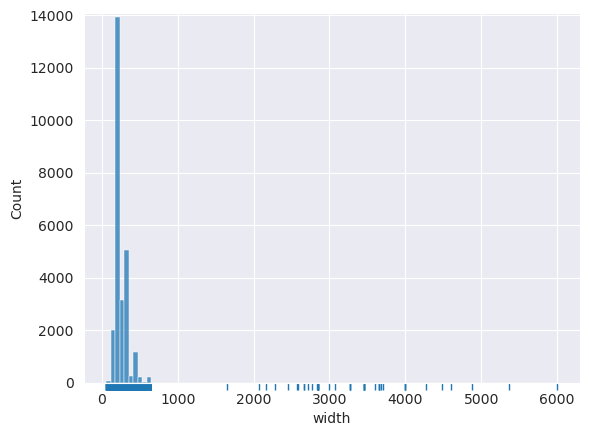

In [87]:
sns.histplot(df_size, x='width', bins=100, log_scale=False)
sns.rugplot(df_size, x='width', height=-.02, clip_on=False)

<AxesSubplot:xlabel='height', ylabel='Count'>

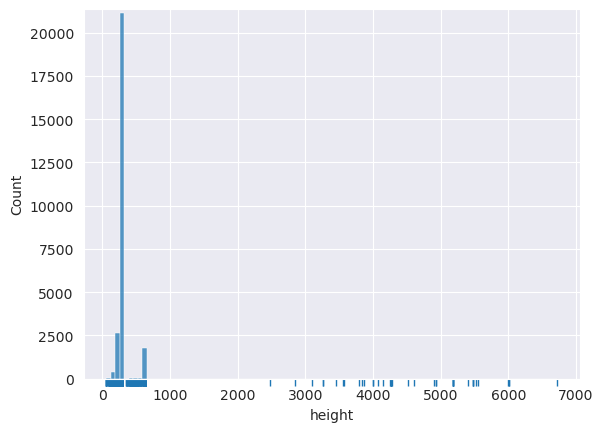

In [88]:
sns.histplot(df_size, x='height', bins=100, log_scale=False)
sns.rugplot(df_size, x='height', height=-.02, clip_on=False)

### Tackling these outliers
Looking at these distributions, its clear there are alot larger outliers. Due to this its hard to see how many smaller outliers there are. We can put these graphs into log-scale, but it loses readability as it puts the pixels into log scale which is not ideal in out case. Additonally, we do not need to care so much about the larger outliers in image size. These can just simple be downscaled with a resize when the dataloader is made. Whats more important is the small image size outliers.

These becomem an issue because small image sizes will not gain detail as they get upscaled. They will be upscaled in a blurry, pixalted mess. This could hurt training of a model as it doesnt hold any coherent image information for it to learn from. To get a better idea where these are located, lets crop off the larger outliers as we previously discussed they were ok. A good value to shop off is around 750 pixels. We will also increase the number of bins to help us analyze these bins now that we are up close and personal.

<AxesSubplot:xlabel='width', ylabel='Count'>

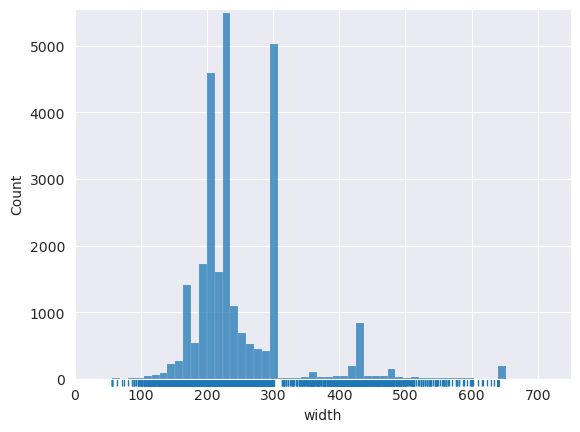

In [94]:
plotz = sns.histplot(df_size, x='width', bins=500, log_scale=False)
plotz.set_xlim(0,750)
sns.rugplot(df_size, x='width', height=-.02, clip_on=False)

<AxesSubplot:xlabel='height', ylabel='Count'>

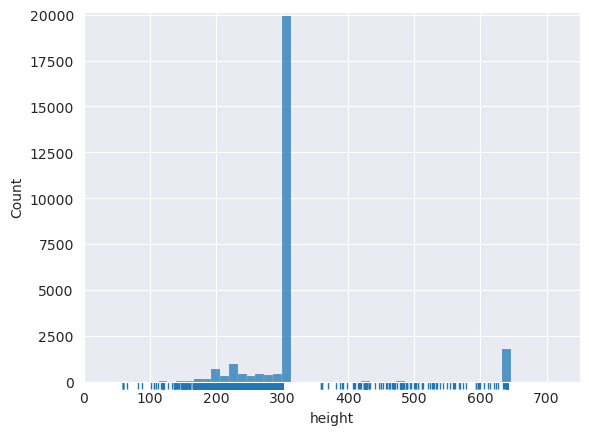

In [95]:
plotz = sns.histplot(df_size, x='height', bins=500, log_scale=False)
plotz.set_xlim(0,750)
sns.rugplot(df_size, x='height', height=-.02, clip_on=False)

Now its much easier to see that if we would like to get rid of the small image outliers, we should aim for around 100px width and height. This will make sure that any image that does need to be upscaled, it will have atleast 100px width and height. This makes sure we have enough information for upscaling so the picture is still usefull for training. As seen the the distrubtions above, there seems to be a small subset of images that have these dimensions, so it also shouldnt be throwing away too much data.